In [103]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel_h,sobel_v,gaussian

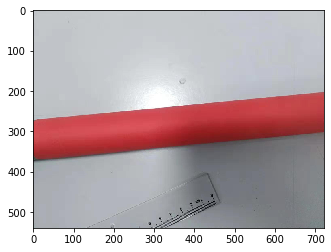

In [104]:
img_raw = plt.imread("data/3.jpg")
img_raw = img_raw[::2,::2]
plt.imshow(img_raw)

c:\users\keli\onedrive\develop\_libs\pyenvs\sci\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


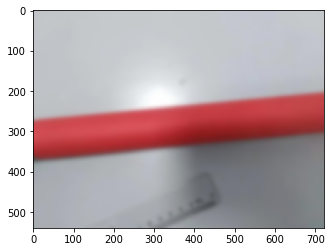

In [105]:
img_blur = gaussian(img_raw,5)
plt.imshow(img_blur)

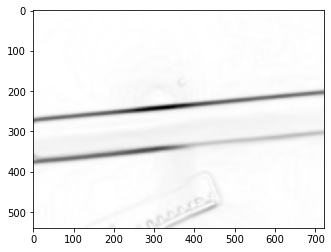

In [106]:
def sobel(img):
    components = []
    for c in range(np.shape(img)[-1]):
        components.append(sobel_h(img[:,:,c]))
        components.append(sobel_v(img[:,:,c]))
    components = np.array(components)
    edge = np.sqrt(np.sum(np.square(components),0))
    return edge

edges = sobel(img_blur)
plt.imshow(edges,cmap='Greys')

(0, 540)

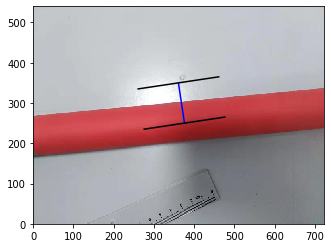

In [107]:
h, w = np.shape(edges)
p1 = np.array([w//2, h//2+80],np.float) 
p2 = np.array([w//2+15, h//2-20],np.float)

def plot_ruler(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    plt.plot((x1,x2),(y1,y2),color='blue')
    
    y11 = y1-(x2-x1)
    y12 = y1+(x2-x1)
    x11 = x1+(y2-y1)
    x12 = x1-(y2-y1)
    plt.plot((x11,x12),(y11,y12),color='black')
    
    y21 = y2-(x2-x1)
    y22 = y2+(x2-x1)
    x21 = x2+(y2-y1)
    x22 = x2-(y2-y1)
    plt.plot((x21,x22),(y21,y22),color='black')

plt.imshow(img_raw, extent=(0,w,0,h))
plot_ruler(p1,p2)
plt.xlim(0,w)
plt.ylim(0,h)

In [108]:
ps = np.stack(np.meshgrid(np.arange(w),np.flip(np.arange(h))),-1)

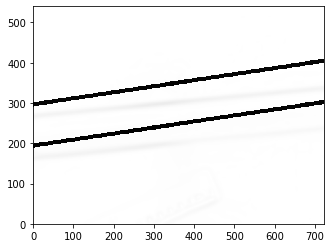

In [109]:
def lines_mask(p1,p2,ps,thickness=5):
    n = p2-p1
    n = n/np.sqrt(np.sum(np.square(n),-1))
    line1 = np.abs(np.sum((ps-p1)*n,-1))<=thickness
    line2 = np.abs(np.sum((ps-p2)*n,-1))<=thickness
    return line1, line2

line1, line2 = lines_mask(p1,p2,ps,thickness=5)
plt.imshow(line1+line2+edges, extent=(0,w,0,h),cmap="Greys")


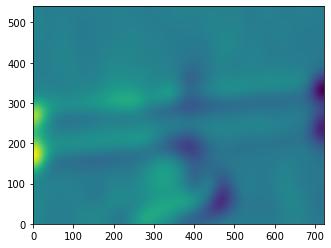

In [110]:
edges_blur1 = gaussian(edges,np.max([h,w])/30)

grad = np.stack([sobel_v(edges_blur1),-sobel_h(edges_blur1)],-1)

plt.imshow(grad[...,0], extent=(0,w,0,h))

In [111]:
def compute_pan(grad,mask):
    mask = np.expand_dims(mask,-1)
    pan = np.sum(grad * mask,(0,1))
    return pan
    
mask = np.any([line1,line2],0)
compute_pan(grad,mask)

array([ 0.70072147, -6.01243538])

In [112]:
plt.imshow(img_raw, extent=(0,w,0,h))

k = 1

for i in range(10):
    
    mask1, mask2 = lines_mask(p1,p2,ps,thickness=5)
    mask = mask1|mask2

    pan = compute_pan(grad,mask)
    
    p1 += pan*k
    p2 += pan*k
    
    plot_ruler(p1,p2)
    
